<img src = "https://thumbs2.imgbox.com/32/93/xRH3CBEG_t.png" width="250">

# Modelo de Exposição por Inadimplência
___

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score

from funcoes.funcoes import *

import warnings
warnings.filterwarnings("ignore")

In [21]:
LC_defaults = pd.read_csv('dados/dados_WoE_VI_LGD_EAD_regressao.csv')

In [22]:
LC_defaults.head()

,funded_amnt,term,int_rate,annual_inc,dti,inq_last_6mths,revol_util,tot_cur_bal,mths_since_rcnt_il,total_bal_il,...,initial_list_status:w,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,taxa_recuperacao,taxa_recuperacao_0_1,fator_conversao_credito
0,9000,36,5.32,58000.0,10.39,0,4.2,7063,26,1982,...,1,0,0,0,0,0,0,0.0,0,0.0
1,8300,36,9.44,54000.0,16.91,0,30.7,26958,4,21058,...,1,1,0,0,0,0,0,0.0,0,0.0
2,4225,36,17.57,35000.0,29.25,2,82.0,35796,0,0,...,0,0,0,1,0,0,0,0.0,0,0.0
3,28000,36,7.49,425000.0,8.97,0,28.0,503070,0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
4,3000,36,5.31,72000.0,14.60,0,3.0,305664,3,28880,...,1,0,0,0,0,0,0,0.0,0,0.0


In [23]:
LC_defaults.shape

(877648, 45)

In [24]:
# separando dados
X = LC_defaults.drop(['target', 'taxa_recuperacao','taxa_recuperacao_0_1','fator_conversao_credito'], axis = 1)
y = LC_defaults['fator_conversao_credito']

In [25]:
# separando dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
reg_ead = LinearRegression()
reg_ead.fit(X_train, y_train)

LinearRegression()

In [9]:
nomes_features = X_train.columns.values

In [10]:
tabela_sumario = pd.DataFrame(columns = ['nome_feature'], data = nomes_features)
tabela_sumario['coeficiente'] = np.transpose(reg_ead.coef_)
tabela_sumario.index = tabela_sumario.index + 1
tabela_sumario.loc[0] = ['intercept', reg_ead.intercept_]
tabela_sumario = tabela_sumario.sort_index()

p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
tabela_sumario['p_valor'] = p_values.round(3)
tabela_sumario

,nome_feature,coeficiente,p_valor
0,intercept,1.874764e-01,NaN
1,funded_amnt,5.543272e-06,0.000
2,term,-5.749920e-04,0.000
3,int_rate,-1.265735e-02,0.000
4,annual_inc,-1.170670e-08,0.000
5,dti,-6.248513e-05,0.000
6,inq_last_6mths,6.243627e-03,0.000
7,revol_util,1.172244e-04,0.000
8,tot_cur_bal,5.336544e-09,0.008
9,mths_since_rcnt_il,-2.056083e-04,0.000


### Validação do modelo

In [13]:
y_hat_test_ead = reg_ead.predict(X_test)

In [14]:
# baixa correlação, mas satisfatórica para um modelo EAD
# caso a correlação fosse muito alta, o modelo teria que ser refeito
y_test_temp = y_test
y_test_temp = y_test_temp.reset_index(drop = True)
pd.concat([y_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

,fator_conversao_credito,0
fator_conversao_credito,1.000000,0.644892
0,0.644892,1.000000


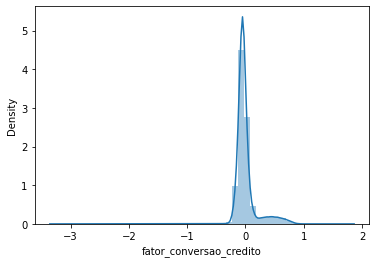

In [15]:
# distribuição concentrada perto de zero, condizendo com os dados
# então o modelo é aceitável metodologicamente
sns.distplot(y_test - y_hat_test_ead);

In [16]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,263295.000000
mean,0.085858
std,0.155007
min,-1.115372
25%,0.014358
50%,0.061506
75%,0.115482
max,4.176283


In [17]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [18]:
# Valores máximos e mínimos dentro dos valores que deveriam ser preditos, 1 e 0.
pd.DataFrame(y_hat_test_ead).describe()

,0
count,263295.000000
mean,0.092705
std,0.130945
min,0.000000
25%,0.014358
50%,0.061506
75%,0.115482
max,1.000000


In [19]:
import pickle
pickle.dump(reg_ead, open('modelos/modelo_ead_v1.sav', 'wb'))

---